In [9]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random
import cv2

In [4]:
img_dir = '../dataset/images'
anno_dir = '../dataset/annotations'

In [11]:
def plot_class_distribution():
    class_counts = {
        'with_mask': 0, 
        'without_mask': 0, 
        'mask_weared_incorrect': 0 
    }

    xml_files = [f for f in os.listdir(anno_dir) if f.endswith('.xml')]

    for xml_file in xml_files:
        tree = ET.parse(os.path.join(anno_dir, xml_file))
        root = tree.getroot()
        
        for obj in root.findall('object'):
            name = obj.find('name').text
            
            if name in class_counts:
                class_counts[name] += 1
            else:
                pass

    names = list(class_counts.keys())
    values = list(class_counts.values())
    
    plt.figure(figsize=(10, 6)) 
    
    colors = ['#2ecc71', '#e74c3c', '#f39c12']
    
    bars = plt.bar(names, values, color=colors)
    
    for bar in bars:
        yval = bar.get_height()
        label_text = int(yval) if yval > 0 else "0"
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, label_text, 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.title('Data Statistics', fontsize=15)
    
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    for k, v in class_counts.items():
        print(f"   - {k}: {v}")
    plt.show()

In [6]:
def visualize_sample_image():
    all_xmls = [f for f in os.listdir(anno_dir) if f.endswith('.xml')]

    random_file = random.choice(all_xmls)
    xml_path = os.path.join(anno_dir, random_file)
    
    img_name_png = random_file.replace('.xml', '.png')
    img_name_jpg = random_file.replace('.xml', '.jpg')
    
    img_path = None
    if os.path.exists(os.path.join(img_dir, img_name_png)):
        img_path = os.path.join(img_dir, img_name_png)
    elif os.path.exists(os.path.join(img_dir, img_name_jpg)):
        img_path = os.path.join(img_dir, img_name_jpg)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    colors = {'with_mask': (0, 255, 0), 'without_mask': (255, 0, 0)}
    
    found_classes = []
    
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        color = colors.get(name, (255, 255, 0)) 
        
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, 2)
        cv2.putText(img, name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        found_classes.append(name)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Sample: {random_file} | Objects: {list(set(found_classes))}")
    plt.show()

# **Data Statistics**

   - with_mask: 3232
   - without_mask: 717
   - mask_weared_incorrect: 123


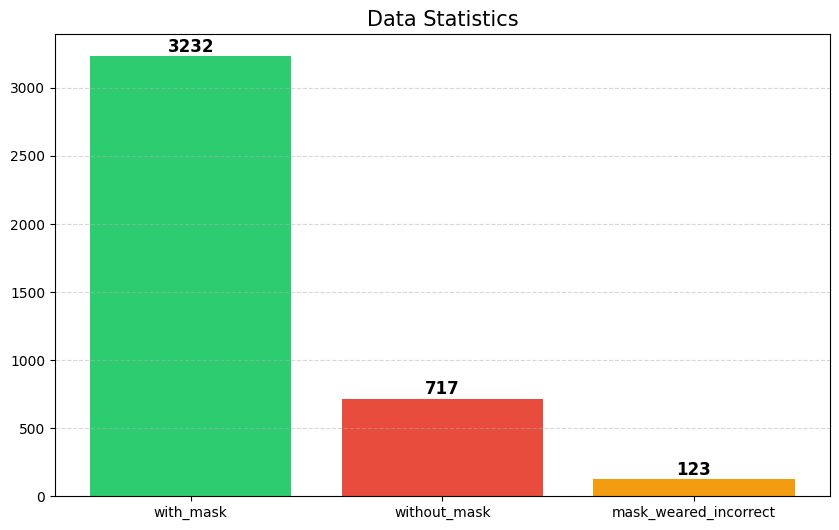

In [12]:
plot_class_distribution()

# **Ground Truth**

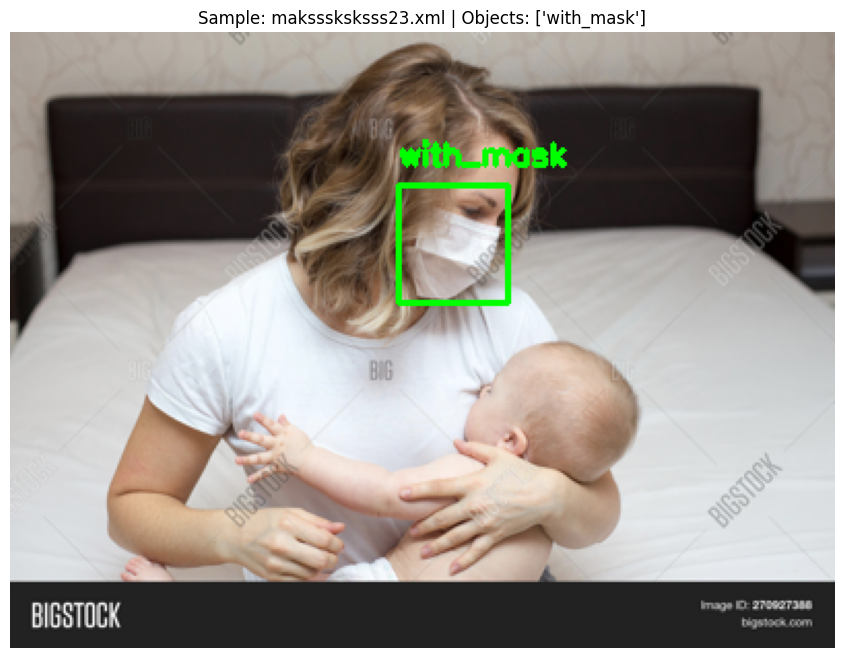

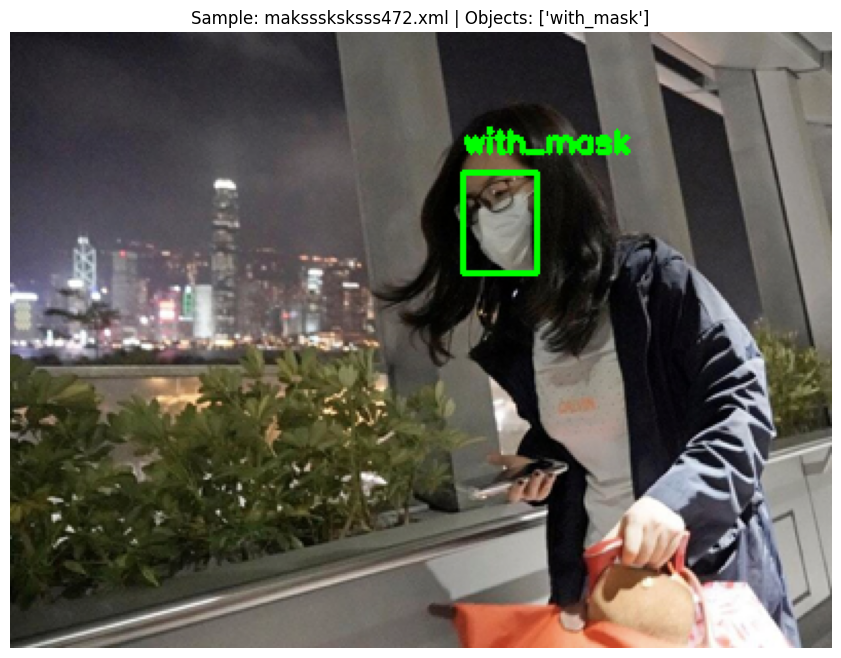

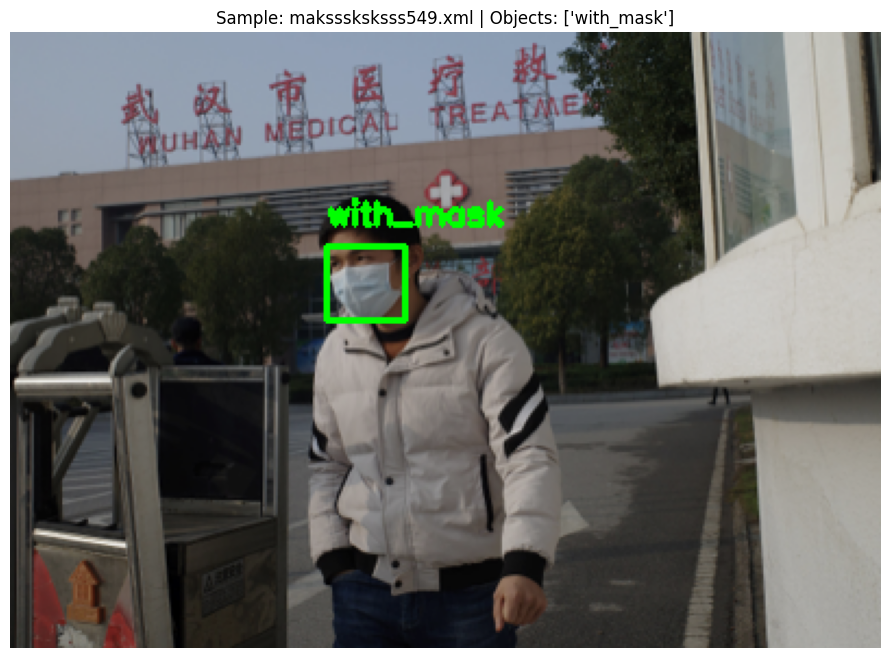

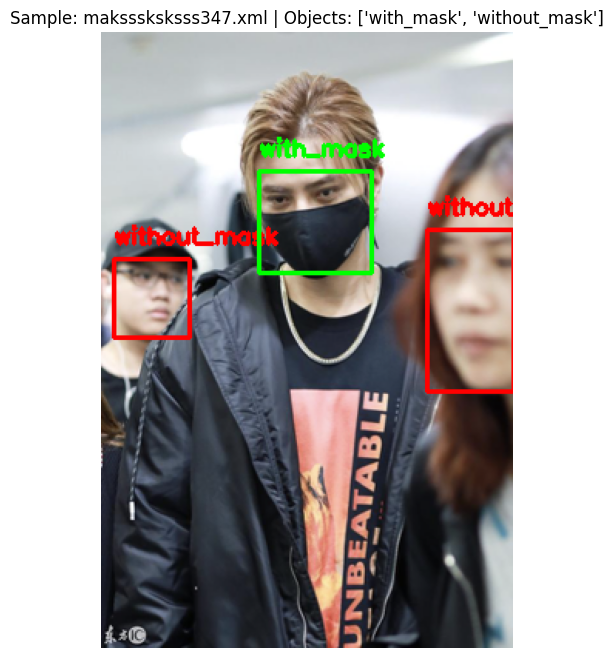

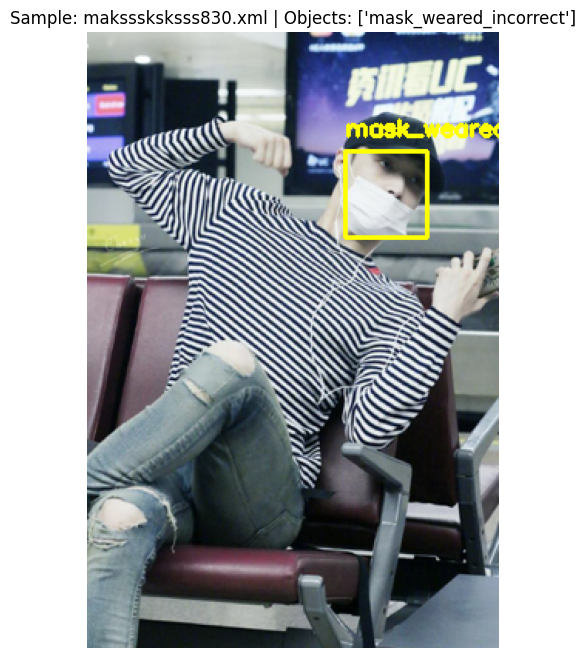

In [15]:
for _ in range(5):
    visualize_sample_image()